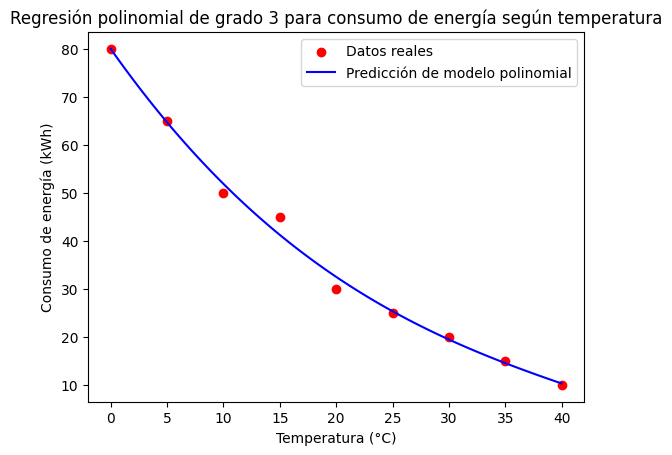

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Datos de ejemplo
# Temperaturas en grados Celsius
temperaturas = np.array(
  [0, 5, 10, 15, 20, 25, 30, 35, 40]
)
# Consumo de energía en kWh
consumo_energia = np.array(
  [80, 65, 50, 45, 30, 25, 20, 15, 10]
)

# Transformar los datos para incluir términos polinomiales 
# Grado del polinomio
grado = 3
polynomial_features = PolynomialFeatures(degree=grado)
temperaturas_poly = polynomial_features.fit_transform(
  temperaturas.reshape(-1, 1)
)

# Ajustar el modelo de regresión polinomial
model = LinearRegression()
model.fit(temperaturas_poly, consumo_energia)

# Crear datos para la linea de predicción
temperaturas_line = np.linspace(
  min(temperaturas), 
  max(temperaturas), 
  100
).reshape(-1, 1)

temperaturas_line_poly = polynomial_features.transform( temperaturas_line )

# Realizar la predicción
consumo_energia_pred = model.predict(temperaturas_line_poly)

# Graficar los datos y la linea de predicción
plt.scatter(
  temperaturas, 
  consumo_energia, 
  color='red',
  label = 'Datos reales'
)
plt.plot(
  temperaturas_line, 
  consumo_energia_pred, 
  color='blue',
  label = 'Predicción de modelo polinomial'
)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo de energía (kWh)')
plt.title( f'Regresión polinomial de grado {grado} para consumo de energía según temperatura' )
plt.legend()
plt.show()